<a href="https://colab.research.google.com/github/gsofianidou/IDS/blob/main/IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
from sklearn.neural_network import MLPClassifier

In [198]:
epochs = 100
nclass = 12

In [199]:
def loadDataset():
    # Put dataset path here !
    filename='https://raw.githubusercontent.com/kdemertzis/EKPA/refs/heads/main/Data/pcap_data.csv'

    trainfile = pd.read_csv(filename)
    data = pd.DataFrame(trainfile).to_numpy()
    data=data[data[:,25]!='DrDoS_LDAP']
    np.random.shuffle(data)

    # κατανομή της εξαρτημένης μεταβλητής (target)
    LABELS = ["Anomaly", "Normal", "Attack"]
    count_classes = pd.value_counts(trainfile['target'], sort = True)
    print(count_classes)
    count_classes.plot(kind = 'bar', rot=0)
    plt.title("Transaction class distribution")
    plt.xticks(range(3), LABELS)
    plt.xlabel("Class")
    plt.ylabel("Frequency");


    label = data[:,25].astype('int')

    label[label == 'WebDDoS']       = 0
    label[label == 'BENIGN']        = 1
    label[label == 'UDP-lag']       = 2
    label[label == 'DrDoS_NTP']     = 3
    label[label == 'Syn']           = 4
    label[label == 'DrDoS_SSDP']    = 5
    label[label == 'DrDoS_UDP']     = 6
    label[label == 'DrDoS_NetBIOS'] = 7
    label[label == 'DrDoS_MSSQL']   = 8
    label[label == 'DrDoS_SNMP']    = 9
    label[label == 'TFTP']          = 10
    label[label == 'DrDoS_DNS']     = 11
    #label[label == 'DrDoS_LDAP']     = 11

    # SELECT FEATURES ----------------------------------------------------
    inx_sel=-1+np.array([13, 6, 24, 17, 3, 9, 7, 14, 11, 21, 1, 22, 25, 17, 19, 10,
                         8, 20, 23, 18, 2, 15, 12, 16, 5, 4])

    # MIN-MAX normalization
    data=data[:,inx_sel]
    dmin = data.min(axis=0)
    dmax = data.max(axis=0)
    data=(data-dmin)/(dmax-dmin)
    # data = np.log(data-dmin+1.0)


    # Test data 20%
    train_data, test_data, train_label, test_label = \
        train_test_split(data, label, test_size=0.20, stratify=label)

    # Train 70%, Validation %10
    train_data, val_data, train_label, val_label = \
        train_test_split(train_data, train_label, test_size=0.125, stratify=train_label)


    return train_data.astype('float32'), train_label.astype('int32'), \
        val_data.astype('float32'), val_label.astype('int32'), \
            test_data.astype('float32'), test_label.astype('int32')


<ipython-input-199-22c265ac707d>:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(trainfile['target'], sort = True)


target
1.0    5013
0.0    5002
2.0    4952
Name: count, dtype: int64
train_data.shape= (10476, 26)
test_data.shape= (2994, 26)
val_data.shape= (1497, 26)


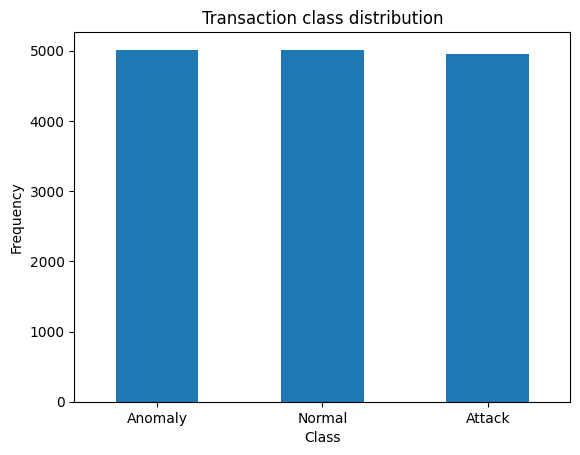

In [200]:
# -- LOAD DATA -----------------------------------------------------------------
train_data, train_labelp, val_data, val_labelp, test_data, test_labelp = loadDataset()

# to_categorical
train_label = to_categorical(train_labelp, nclass)
val_label   = to_categorical(val_labelp, nclass)
test_label  = to_categorical(test_labelp, nclass)

print('train_data.shape=', train_data.shape)
print('test_data.shape=',  test_data.shape)
print('val_data.shape=',  val_data.shape)

#get the number of features
inshape=train_data.shape[1]

# Class balancing weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(
                                                      train_labelp),
                                                  y=train_labelp)


class_weights = {i: class_weights[i] for i in range(len(class_weights))}

In [201]:
# -- CALLBACKS -----------------------------------------------------------------
earlyStopping = EarlyStopping(monitor='val_loss',
                              patience=30,
                              verbose=0,
                              mode='min')

#modelCheckPoint = ModelCheckpoint(C:\Users\Laptop\Desktop.weights.h5)

# reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss',
#                                   factor=0.1,
#                                   patience=7,
#                                   verbose=1,
#                                   epsilon=1e-4,
#                                   mode='min')

# -- Baseline models-----------------------------------------------------------

# -- Conv1d
model = models_ddos.model_conv1D(lr=1e-4,N=64,inshape=inshape)
# -- Dense
# model=models_ddos.model_dense(lr=1e-4,N=64,inshape=inshape)
# -- LSTM
# model=models_ddos.model_lstm(lr=1e-4,N=64,inshape=inshape)

model.summary()
# -----------------------------------------------------------------------------
# print model to an image file
# dot_img_file = 'model1.png'
# plot_model(model, to_file=dot_img_file, show_shapes=True)

NameError: name 'models_ddos' is not defined

In [271]:
# -- TRAIN MODEL -----------------------------------------------------------------
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

#δημιουργία αποθετηρίων για την αποθήκευση των αποτελεσμάτων απόδοσης του μοντέλου
ML_Model = ['MLP']
acc_train_mlp = []
acc_test_mlp = []
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=[100,100,100], activation='logistic', solver='adam', alpha=0.001, random_state=42, max_iter=778)
mlp.fit(X_train, y_train)
X_train.shape, y_train.shape
#έλεγχος καταλληλότητας μοντέλου
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)
acc_train_mlp = accuracy_score(y_train, y_train_mlp)
acc_test_mlp = accuracy_score(y_test, y_test_mlp)

#δημιουργία πλαισίου δεδομένων (dataframe)
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train_mlp,
    'Test Accuracy': acc_test_mlp})
results

,ML Model,Train Accuracy,Test Accuracy
0,MLP,1.0,0.92


In [300]:
history = MLPClassifier.fit(train_data, train_label, shuffle=True, epochs=epochs, batch_size=256, class_weight=class_weights, workers=3)

SyntaxError: positional argument follows keyword argument (<ipython-input-300-089e542b3c8a>, line 1)

In [325]:
# --Confusion matrix ----------------------------------------------------------

print('TEST DATA-Confusion matrix:')
pred = mlp.predict(X_test)

print(pred)
pred_y = mlp.predict(y_test)
print(pred_y)


cm = confusion_matrix(test_labelp.astype('int32'), pred_y)
print(cm)

print('Accuracy ratios for each class')
print('WebDDoS      =', cm[0, 0]/np.sum(cm[0, :]))
print('BENIGN       =', cm[1, 1]/np.sum(cm[1, :]))
print('UDP-lag      =', cm[2, 2]/np.sum(cm[2, :]))
print('DrDoS_NTP    =', cm[3, 3]/np.sum(cm[3, :]))
print('Syn          =', cm[4, 4]/np.sum(cm[4, :]))
print('DrDoS_SSDP   =', cm[5, 5]/np.sum(cm[5, :]))
print('DrDoS_UDP    =', cm[6, 6]/np.sum(cm[6, :]))
print('DrDoS_NetBIOS=', cm[7, 7]/np.sum(cm[7, :]))
print('DrDoS_MSSQL  =', cm[8, 8]/np.sum(cm[8, :]))
print('DrDoS_SNMP   =', cm[9, 9]/np.sum(cm[9, :]))
print('TFTP         =', cm[10,10]/np.sum(cm[10, :]))
print('DrDoS_DNS    =', cm[11,11]/np.sum(cm[11, :]))




TEST DATA-Confusion matrix:
[1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1]


ValueError: Expected 2D array, got 1D array instead:
array=[1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.